In [1]:
import os
import torch

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from pathlib import Path

In [2]:
def plot_MI_planes(MI_X_L: dict, MI_L_Y: dict, filtered_MI_X_L: dict=None, filtered_MI_L_Y: dict=None,
                   n_columns: int=3) -> None:
    """
    Plot information plane data for each layer in a subplot.
    
    Parameters
    ----------
    MI_X_L : dict
        Raw I(X;L) data (with errorbars).
    MI_L_Y : dict
        Raw I(L;Y) data (with errorbars).
    filtered_MI_X_L : dict
        Filtered I(X;L) data.
    filtered_MI_L_Y : dict
        Filtered I(L;Y) data.
    """
    
    assert len(MI_X_L) == len(MI_L_Y)
    
    filtered_provided = (not filtered_MI_X_L is None) and (not filtered_MI_L_Y is None)
    
    # Number of rows.
    n_rows = len(MI_X_L) // n_columns + (len(MI_X_L) % n_columns != 0)
    
    width = 6
    height = 4
    fig, ax = plt.subplots(n_rows, n_columns, figsize=(width * n_columns, height * n_rows))
    for index, layer_name in enumerate(MI_X_L.keys()):
        row_index = index // n_columns
        column_index = index % n_columns
        subplot_ax = ax[row_index, column_index]
        
        subplot_ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
        subplot_ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
        subplot_ax.set_title(str(layer_name))
        
        x =     [item[0] for item in MI_X_L[layer_name]]
        x_err = [item[1] for item in MI_X_L[layer_name]]
        y =     [item[0] for item in MI_L_Y[layer_name]]
        y_err = [item[1] for item in MI_L_Y[layer_name]]
        
        if filtered_provided:
            subplot_ax.errorbar(x, y, x_err, y_err, ls='none', solid_capstyle='projecting', capsize=3, alpha=0.25, color='lightblue')
            subplot_ax.plot(filtered_MI_X_L[layer_name], filtered_MI_L_Y[layer_name], color='red')
        else:
            subplot_ax.plot(x, y)
            #subplot_ax.scatter(x, y, cmap=list(range(len(x))))
            
    plt.show();

# Load data

In [3]:
from tbparse import SummaryReader
import pandas as pd

log_dir = 'runs/'
reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.scalars

run_name = 'run_20251224_064929'

In [4]:
df_run = df[df['dir_name'] == run_name].copy()
df_wide = df_run.pivot_table(index='step', columns='tag', values='value', aggfunc='first').reset_index()
df_wide = df_wide[df_wide['Acc/test'].notna()]

In [5]:
data = pd.DataFrame()
# Test MI
data['step'] = df_wide['step']
data['mi_x_1'] = df_wide['MI(X;L)_eval/layer 1']
data['mi_x_2'] = df_wide['MI(X;L)_eval/layer 2']
data['mi_x_3'] = df_wide['MI(X;L)_eval/layer 3']
data['mi_y_1'] = df_wide['MI(L;Y)_eval/layer 1']
data['mi_y_2'] = df_wide['MI(L;Y)_eval/layer 2']
data['mi_y_3'] = df_wide['MI(L;Y)_eval/layer 3']
# Train MI
data['train_mi_x_1'] = df_wide['MI(X;L)_train/layer 1']
data['train_mi_x_2'] = df_wide['MI(X;L)_train/layer 2']
data['train_mi_x_3'] = df_wide['MI(X;L)_train/layer 3']
data['train_mi_y_1'] = df_wide['MI(L;Y)_train/layer 1']
data['train_mi_y_2'] = df_wide['MI(L;Y)_train/layer 2']
data['train_mi_y_3'] = df_wide['MI(L;Y)_train/layer 3']
# Accuracy and weight norm
data['acc_test'] = df_wide['Acc/test']
data['acc_train'] = df_wide['Acc/train']
data['wn'] = df_wide['WN/total']
data['wn1'] = df_wide['WN/linear_1']
data['wn2'] = df_wide['WN/linear_2']
data['wn3'] = df_wide['WN/linear_3']

data.reset_index(inplace=True)
data

,index,step,mi_x_1,mi_x_2,mi_x_3,mi_y_1,mi_y_2,mi_y_3,train_mi_x_1,train_mi_x_2,train_mi_x_3,train_mi_y_1,train_mi_y_2,train_mi_y_3,acc_test,acc_train,wn,wn1,wn2,wn3
0,0,0,0.646859,0.527502,0.247438,1.398694,1.313069,0.717993,0.256794,0.190695,0.075407,1.118657,0.987988,0.497055,0.097456,0.098958,145.844833,65.324295,65.651802,14.868732
1,1,1,0.656856,0.517662,0.219392,1.403695,1.298947,0.687887,0.270007,0.195219,0.066540,1.143165,0.978624,0.498599,0.088642,0.080729,145.836823,65.321159,65.650948,14.864725
2,2,2,0.663919,0.512029,0.195127,1.407715,1.287377,0.647104,0.282639,0.207136,0.060887,1.155857,0.990300,0.454676,0.085537,0.079427,145.829468,65.318680,65.650352,14.860436
3,3,3,0.668279,0.507403,0.183084,1.409536,1.281705,0.602774,0.288931,0.206049,0.048370,1.158850,0.986103,0.418470,0.085036,0.087240,145.821030,65.316628,65.648918,14.855482
4,4,4,0.669105,0.504810,0.167300,1.410181,1.281148,0.563945,0.292147,0.209121,0.044681,1.159790,0.984333,0.395512,0.094551,0.088542,145.810699,65.314331,65.646484,14.849891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,95000,95000,0.954744,1.261585,1.318743,1.801920,1.724626,1.811167,0.522918,1.130362,1.171169,1.913770,2.051953,2.299572,0.890825,1.000000,69.935791,39.771278,29.330198,0.834311
125,96000,96000,0.952582,1.257455,1.313302,1.808827,1.720134,1.806756,0.533043,1.136423,1.183879,1.915743,2.042130,2.300399,0.890525,1.000000,69.816071,39.701733,29.257015,0.857324
126,97000,97000,0.955331,1.243969,1.316641,1.804844,1.718847,1.822133,0.524497,1.147913,1.201730,1.912321,2.052778,2.300203,0.889423,1.000000,69.690399,39.721344,29.158979,0.810076
127,98000,98000,0.958879,1.280830,1.346810,1.801398,1.728456,1.830657,0.527369,1.140855,1.225493,1.874242,2.037015,2.298916,0.889123,1.000000,69.864235,39.832718,29.105652,0.925862


# Plot


## Information Plane for Eval data

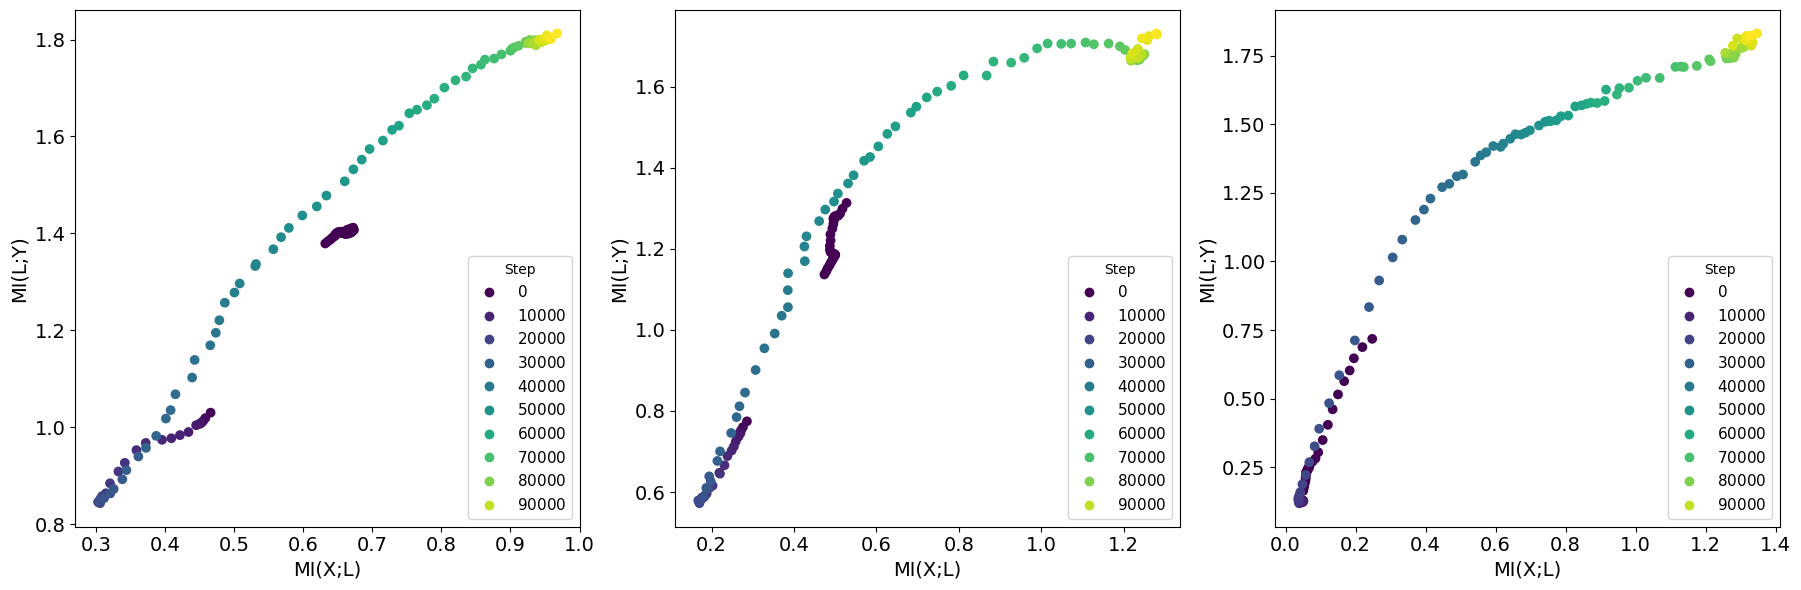

In [6]:
fig, axs2d = plt.subplots(1, 3, figsize=(18,6))

axs_rav = np.ravel(axs2d)

scat0 = axs_rav[0].scatter(data['mi_x_1'].values, data['mi_y_1'].values, c=data['step'].values)
legend2 = axs_rav[0].legend(*np.array(scat0.legend_elements()), loc="lower right", title="Step", fontsize=11)

scat1 = axs_rav[1].scatter(data['mi_x_2'].values, data['mi_y_2'].values, c=data['step'].values)
legend2 = axs_rav[1].legend(*np.array(scat1.legend_elements()), loc="lower right", title="Step", fontsize=11)

scat2 = axs_rav[2].scatter(data['mi_x_3'].values, data['mi_y_3'].values, c=data['step'].values)
legend2 = axs_rav[2].legend(*np.array(scat2.legend_elements()), loc="lower right", title="Step", fontsize=11)

for i in range(3):
    axs_rav[i].tick_params(axis='both', which='major', labelsize=14)
    axs_rav[i].set_xlabel("MI(X;L)", fontsize=14)
    axs_rav[i].set_ylabel("MI(L;Y)", fontsize=14)

# # xlim and ylim
# for ax_ in axs_rav:
#     ax_.set_xlim(-1.5, 3)
#     ax_.set_ylim(0, 2.5)

plt.tight_layout()
plt.show()

## Information Plane for Train data

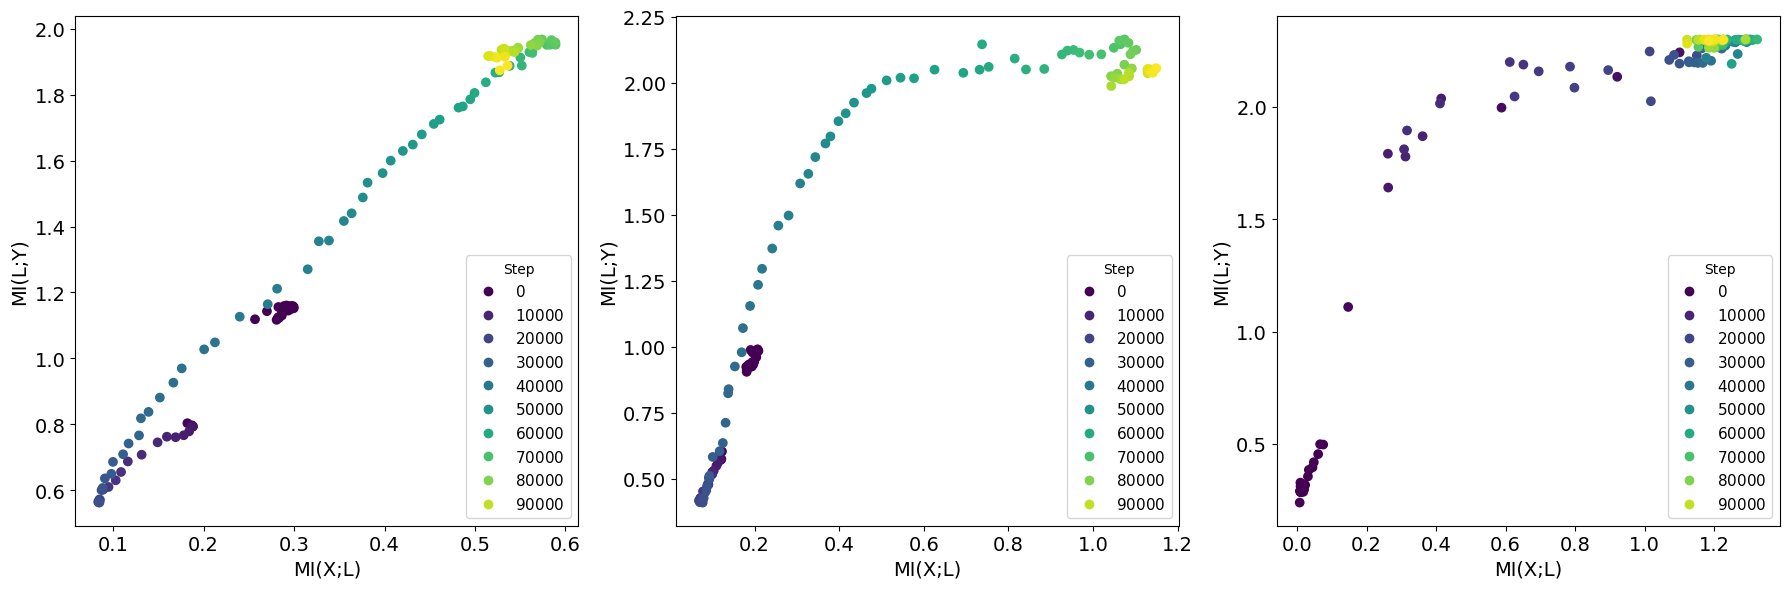

In [7]:
fig, axs2d = plt.subplots(1, 3, figsize=(18,6), )

axs_rav = np.ravel(axs2d)

scat0 = axs_rav[0].scatter(data['train_mi_x_1'].values, data['train_mi_y_1'].values, c=data['step'].values)
legend2 = axs_rav[0].legend(*np.array(scat0.legend_elements()), loc="lower right", title="Step", fontsize=11)

scat1 = axs_rav[1].scatter(data['train_mi_x_2'].values, data['train_mi_y_2'].values, c=data['step'].values)
legend2 = axs_rav[1].legend(*np.array(scat1.legend_elements()), loc="lower right", title="Step", fontsize=11)

scat2 = axs_rav[2].scatter(data['train_mi_x_3'].values, data['train_mi_y_3'].values, c=data['step'].values)
legend2 = axs_rav[2].legend(*np.array(scat2.legend_elements()), loc="lower right", title="Step", fontsize=11)

for i in range(3):
    axs_rav[i].tick_params(axis='both', which='major', labelsize=14)
    axs_rav[i].set_xlabel("MI(X;L)", fontsize=14)
    axs_rav[i].set_ylabel("MI(L;Y)", fontsize=14)

# # xlim and ylim
# for ax_ in axs_rav:
#     ax_.set_xlim(-6, )
#     ax_.set_ylim(0, 5)

plt.tight_layout()
plt.show()

## Equal limits

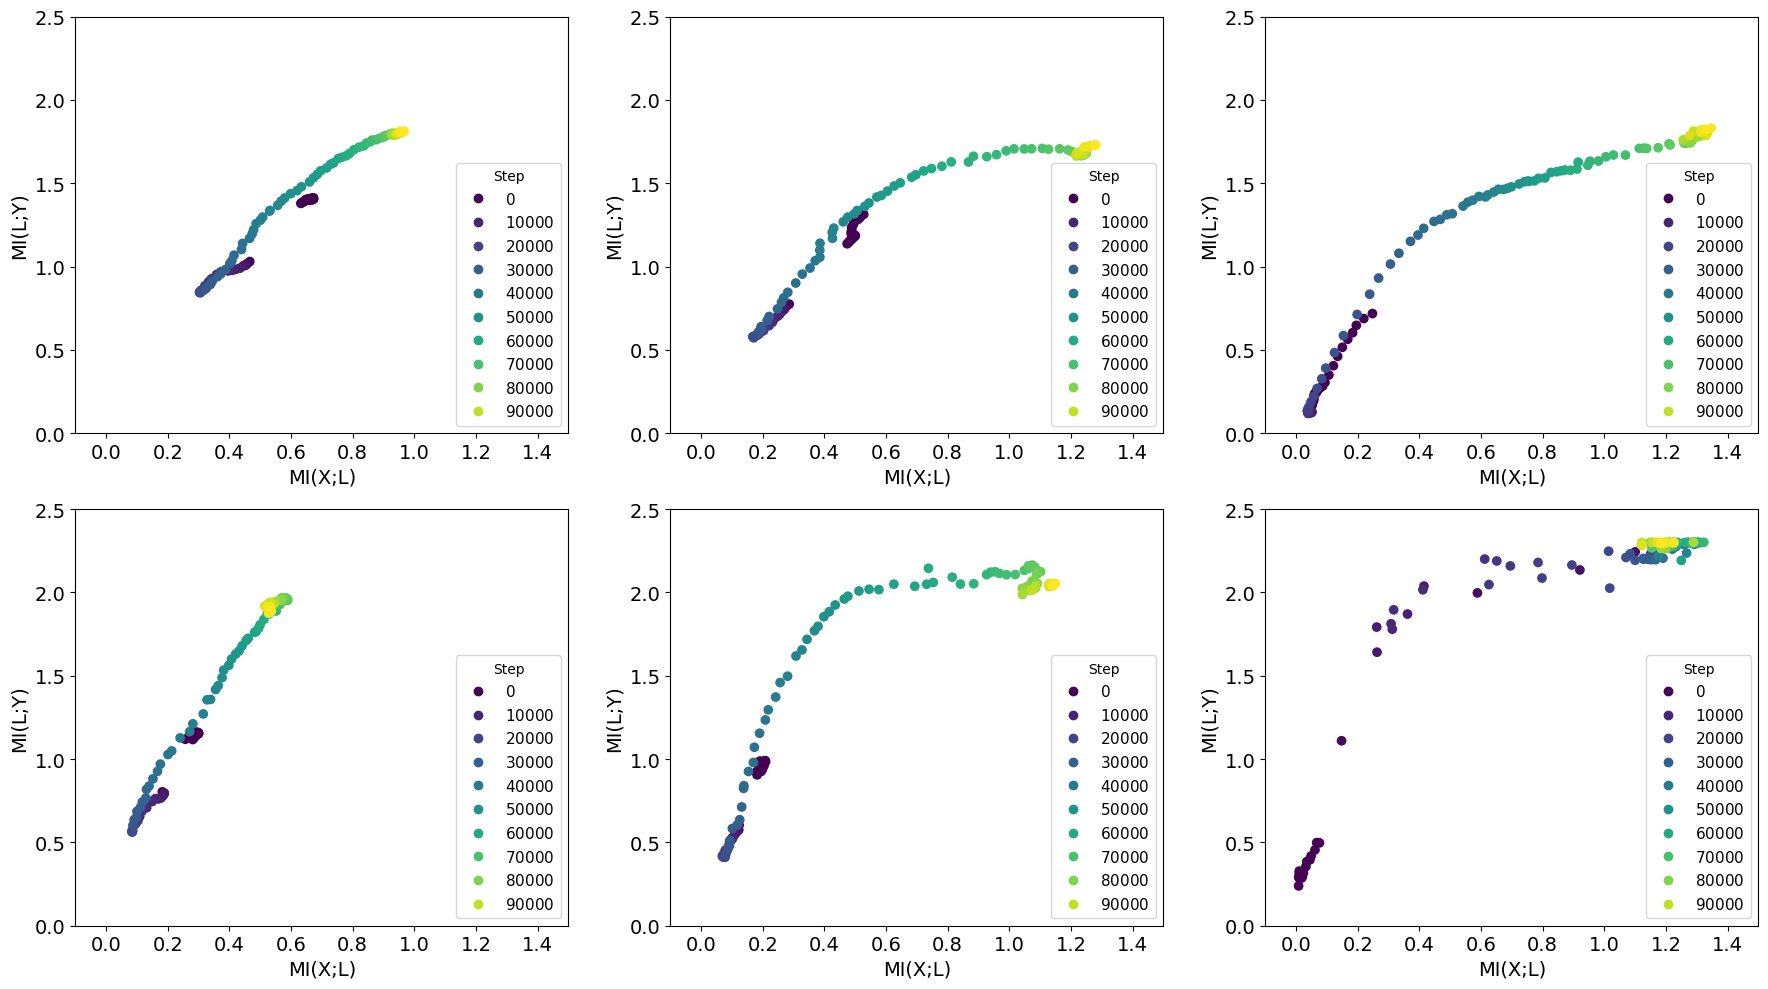

In [8]:
fig, axs2d = plt.subplots(2, 3, figsize=(18,10))

axs_rav = np.ravel(axs2d)

for i in range(3):
    scat0 = axs_rav[i].scatter(data[f'mi_x_{i+1}'].values, data[f'mi_y_{i+1}'].values, c=data['step'].values)
    axs_rav[i].legend(*np.array(scat0.legend_elements()), loc="lower right", title="Step", fontsize=11)
    
    scat0 = axs_rav[i+3].scatter(data[f'train_mi_x_{i+1}'].values, data[f'train_mi_y_{i+1}'].values, c=data['step'].values)
    axs_rav[i+3].legend(*np.array(scat0.legend_elements()), loc="lower right", title="Step", fontsize=11)

for i in range(6):
    axs_rav[i].tick_params(axis='both', which='major', labelsize=14)
    axs_rav[i].set_xlabel("MI(X;L)", fontsize=14)
    axs_rav[i].set_ylabel("MI(L;Y)", fontsize=14)

# xlim and ylim
for ax_ in axs_rav:
    ax_.set_xlim(-0.1, 1.5)
    ax_.set_ylim(0, 2.5)

plt.tight_layout()
plt.show()

## Accuracy and WN

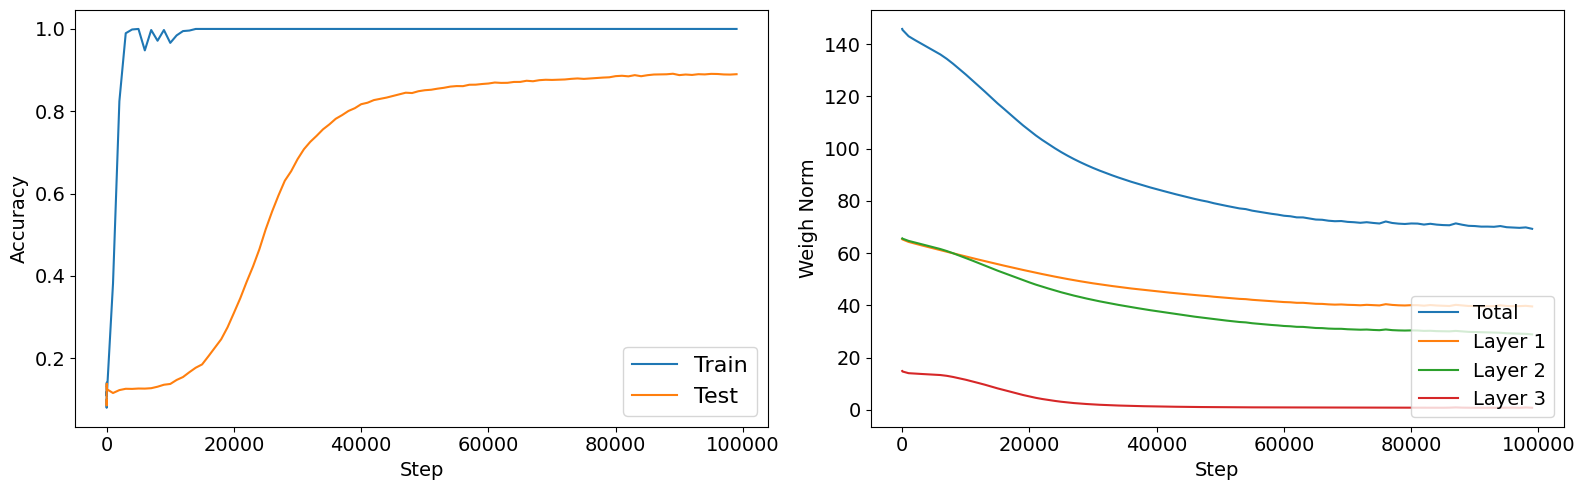

In [9]:
fig, axs2d = plt.subplots(1, 2, figsize=(16,5), )
axs_rav = np.ravel(axs2d)

sns.lineplot(
    data=data, 
    x=f"step", 
    y=f"acc_train",
    ax=axs_rav[0],
    label='Train'
)
sns.lineplot(
    data=data, 
    x=f"step", 
    y=f"acc_test",
    ax=axs_rav[0],
    label='Test'
)
axs_rav[0].legend(loc='lower right', fontsize=16)
axs_rav[0].tick_params(axis='both', which='major', labelsize=14)
axs_rav[0].set_xlabel("Step", fontsize=14)
axs_rav[0].set_ylabel("Accuracy", fontsize=14)
# axs_rav[0].set_xscale('log')

sns.lineplot(
    data=data, 
    x=f"step", 
    y=f"wn",
    ax=axs_rav[1],
    label='Total'
)
for i in range(1, 4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"wn{i}",
        ax=axs_rav[1],
        label=f'Layer {i}'
    )
axs_rav[1].tick_params(axis='both', which='major', labelsize=14)
axs_rav[1].set_xlabel("Step", fontsize=14)
axs_rav[1].set_ylabel("Weigh Norm", fontsize=14)
axs_rav[1].legend(loc='lower right', fontsize=14)
# axs_rav[1].set_xscale('log')

plt.tight_layout()
plt.show()

## Test Accuracy and MI 

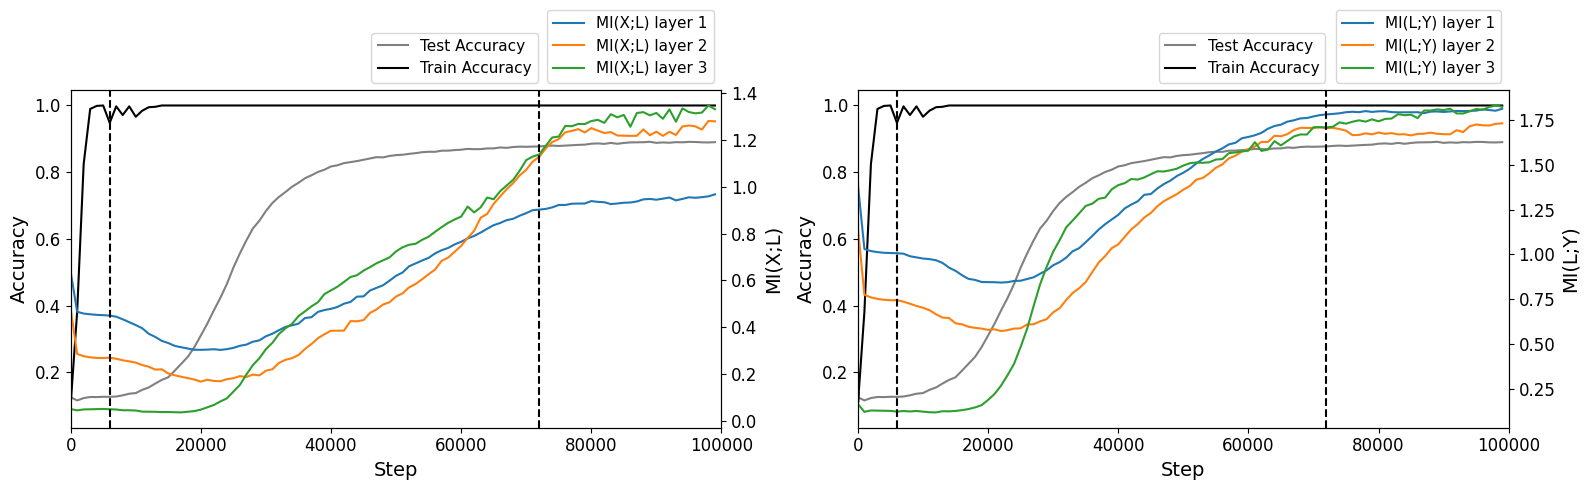

In [10]:
fig, axs2d = plt.subplots(1, 2, figsize=(16,5), )
axs_rav = np.ravel(axs2d)
vlinex_list = (6_000, 72_000)
legend_size = 11
tick_size = 12
label_size = 14
# ---------
# Accuracy
for i in range(2):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"acc_test",
        ax=axs_rav[i],
        color='grey',
        label='Test Accuracy'
    )
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"acc_train",
        ax=axs_rav[i],
        color='black',
        label='Train Accuracy'
    )
# -----------
# MI(X;L)
ax0 = axs_rav[0].twinx()
for i in range(1,4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"mi_x_{i}",
        ax=ax0,
        label=f'MI(X;L) layer {i}'
    )
# legend
axs_rav[0].legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(0.73, 1))
ax0.legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(1, 1))
# tick
axs_rav[0].tick_params(axis='both', which='major', labelsize=tick_size)
ax0.tick_params(axis='both', which='major', labelsize=tick_size)
# label
axs_rav[0].set_xlabel("Step", fontsize=label_size)
axs_rav[0].set_ylabel("Accuracy", fontsize=label_size)
ax0.set_ylabel("MI(X;L)", fontsize=label_size)
# xlim
axs_rav[0].set_xlim(0, 100_000)
# axs_rav[0].set_xscale('log')

# -----------
# MI(L;Y)
ax1 = axs_rav[1].twinx()
for i in range(1,4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"mi_y_{i}",
        ax=ax1,
        label=f'MI(L;Y) layer {i}'
    )
# legend
axs_rav[1].legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(0.73, 1))
ax1.legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(1, 1))
# tick
axs_rav[1].tick_params(axis='both', which='major', labelsize=tick_size)
ax1.tick_params(axis='both', which='major', labelsize=tick_size)
# label
axs_rav[1].set_xlabel("Step", fontsize=label_size)
axs_rav[1].set_ylabel("Accuracy", fontsize=label_size)
ax1.set_ylabel("MI(L;Y)", fontsize=label_size)
# xlim
axs_rav[1].set_xlim(0, 100_000)

# vertical lines
for ax_ in (ax0, ax1):
    for vlinex_ in vlinex_list:
        ax_.axvline(vlinex_, 0, 1000, c='black', linestyle='dashed')

plt.tight_layout()
plt.show()

## Train Accuracy and MI

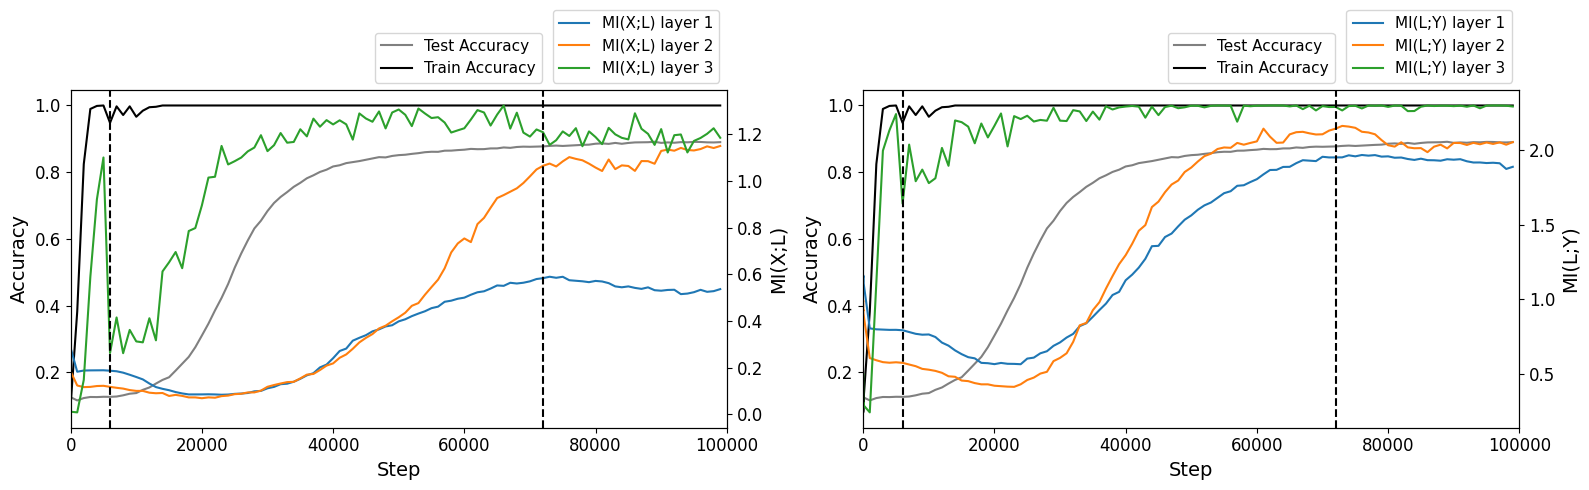

In [11]:
fig, axs2d = plt.subplots(1, 2, figsize=(16,5), )
axs_rav = np.ravel(axs2d)
vlinex_list = (6_000, 72_000)
legend_size = 11
tick_size = 12
label_size = 14
# ---------
# Accuracy
for i in range(2):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"acc_test",
        ax=axs_rav[i],
        color='grey',
        label='Test Accuracy'
    )
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"acc_train",
        ax=axs_rav[i],
        color='black',
        label='Train Accuracy'
    )
# -----------
# MI(X;L)
ax0 = axs_rav[0].twinx()
for i in range(1,4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"train_mi_x_{i}",
        ax=ax0,
        label=f'MI(X;L) layer {i}'
    )
# legend
axs_rav[0].legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(0.73, 1))
ax0.legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(1, 1))
# tick
axs_rav[0].tick_params(axis='both', which='major', labelsize=tick_size)
ax0.tick_params(axis='both', which='major', labelsize=tick_size)
# label
axs_rav[0].set_xlabel("Step", fontsize=label_size)
axs_rav[0].set_ylabel("Accuracy", fontsize=label_size)
ax0.set_ylabel("MI(X;L)", fontsize=label_size)
# xlim
axs_rav[0].set_xlim(0, 100_000)
# axs_rav[0].set_xscale('log')

# -----------
# MI(L;Y)
ax1 = axs_rav[1].twinx()
for i in range(1,4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"train_mi_y_{i}",
        ax=ax1,
        label=f'MI(L;Y) layer {i}'
    )
# legend
axs_rav[1].legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(0.73, 1))
ax1.legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(1, 1))
# tick
axs_rav[1].tick_params(axis='both', which='major', labelsize=tick_size)
ax1.tick_params(axis='both', which='major', labelsize=tick_size)
# label
axs_rav[1].set_xlabel("Step", fontsize=label_size)
axs_rav[1].set_ylabel("Accuracy", fontsize=label_size)
ax1.set_ylabel("MI(L;Y)", fontsize=label_size)
# xlim
axs_rav[1].set_xlim(0, 100_000)

# vertical lines
for ax_ in (ax0, ax1):
    for vlinex_ in vlinex_list:
        ax_.axvline(vlinex_, 0, 1000, c='black', linestyle='dashed')

plt.tight_layout()
plt.show()